In [18]:
import matplotlib.pyplot as plt
import numpy as np


# Exemples de manipulation d'image pour créer des affichages de jeux
# avec matplotlib et numpy uniquement

## Extraction cartes dans fichier

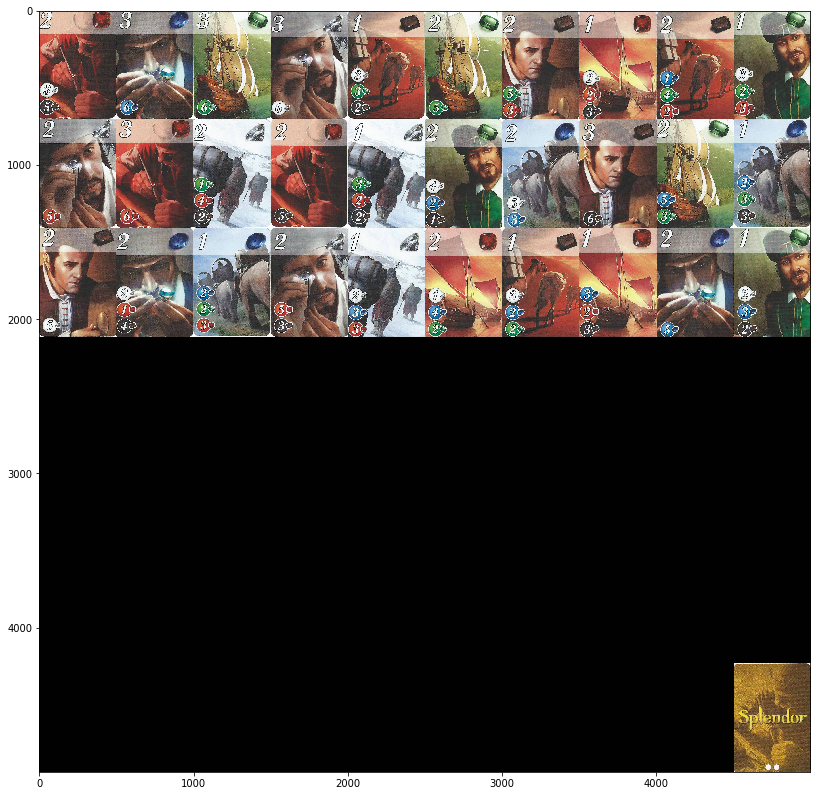

In [187]:
# exemple avec le splendor :
fichier_cartes = plt.imread('httpsiimgurcom0LMecPCjpg.jpg')
### Pour que la ligne précédente marche, il faut que python s'execute dans le même répertoire 
# que l'image (c.f. T.D. entrées/sorties)
fig, ax = plt.subplots(figsize=(14, 14))
plt.imshow(fichier_cartes,interpolation='nearest')
# Ces 2 dernières lignes de codes permettent d'afficher l'image en grand,
# On peut également utiliser seulement la ligne plt.imshow(fichier_cartes), mais dans ce cas 
# l'image est petite par défaut.

In [234]:
# On souhaite enlever toute la partie du bas pour récupérer les visuels des cartes,
# Sous quelle forme se présente l'image?
print(fichier_cartes.shape)

(4935, 5000, 3)


In [235]:
# C'est une image de 4935 pixels de hauteur par 5000 pixels de largeur et 3 couleurs 
# pour chaque pixel (dans l'ordre Red,Green, Blue.)
# Ainsi fichier_cartes[234,356,0] contient le niveau de rouge dans le pixel contenu à la ligne 234 
# et à la colonne 356) 
print(fichier_cartes[234,356,0])

76


# Attention
Le pixel fichier_cartes[x,y] ne correspond pas au pixel d'abscisse x et d'ordonnée y mais celui à la ligne x et à la colonne y.

In [236]:
# C'est une valeur entière entre 0 et 255, c'est une possibilité de codage des couleurs 
# mais il en existe beaucoup d'autres. Ici on n'utilisera que celle-ci.
# On peut également afficher les niveaux de couleurs RGB de ce même pixel en utilisant le slicing (avec ':') :
print(fichier_cartes[234,356,:])

[76 60 61]


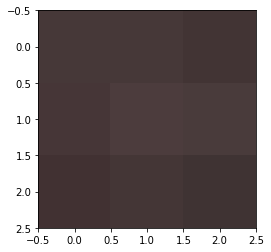

In [241]:
# On peut également afficher ce pixel et ses voisins en affichant un petit caré de coté 3 pixels centré sur (234,356)
carre_voisins = fichier_cartes[234-1:234+2,356-1:356+2,:]
plt.imshow(carre_voisins)
# A noter que l'on va de indice-1 à indice+2 car le dernier indice du slicing est exclu comme d'habitude


taille de la sous image : (101, 101, 3)


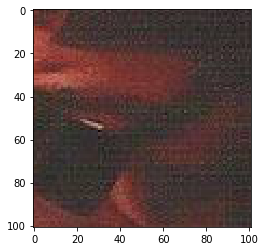

In [247]:
# Et ses voisins dans un carré de 101 par 101 (avec le pixel de position [234,356] au centre) ? 

carre_voisins_2 = fichier_cartes[234-50:234+51,356-50:356+51,:]
plt.imshow(carre_voisins_2)
print('taille de la sous image : '+str(carre_voisins_2.shape))

In [ ]:
# Dans toute la suite on se basera sur cette technique de slicing pour extraire des sous images et les réinsérer dans 
# d'autres. La première tache consiste à extraire les différentes cartes contenues dans le fichiers original
# contenant les scans. 

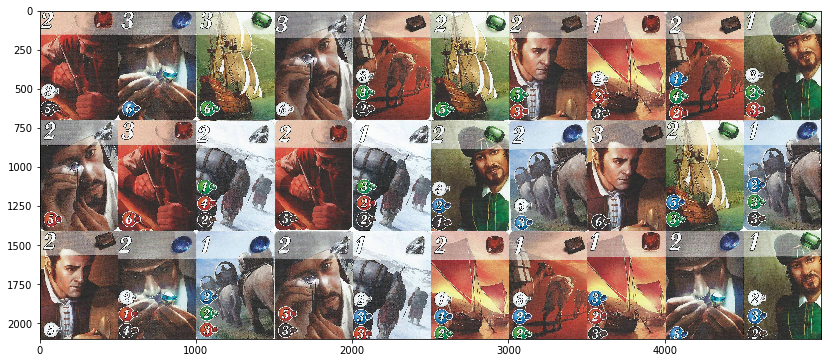

In [192]:
# Découpage à de la partie noire en ne prenant que les premières lignes du fichier :
fichier_cartes_cut = fichier_cartes[:2100,:,:] # slicing en prenant tout jusqu'à la ligne 2100
fig, ax = plt.subplots(figsize=(14, 14))
plt.imshow(fichier_cartes_cut,interpolation='nearest')

In [250]:
# Séparation en comptant lignes et colonnes : 

n_lignes = 3
n_colonnes = 10
L_cartes_splendor = []
correspondances_cartes = []
n_pixels_lignes,n_pixels_colonnes,n_couleurs = fichier_cartes_cut.shape
for i_ligne in range(n_lignes):
    for i_colonne in range(n_colonnes):
        # On calcule les indices des pixels au bord de chaque carte
        
        bord_haut = int(i_ligne/n_lignes*n_pixels_lignes)
        bord_bas = int((i_ligne+1)/n_lignes*n_pixels_lignes)
        bord_gauche = int(i_colonne/n_colonnes*n_pixels_colonnes)
        bord_droite = int((i_colonne+1)/n_colonnes*n_pixels_colonnes)
        
        # Et on extrait la carte avec la technique de slicing précédente
        
        L_cartes_splendor += [fichier_cartes_cut[bord_haut:bord_bas,bord_gauche:bord_droite,:]]
        correspondances_cartes += [[i_ligne,i_colonne]]

affichage de la carte à la position [1, 5]


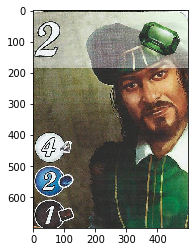

In [252]:
# Affichage de la carte 15:
num_carte = 15
print('affichage de la carte à la position '+str(correspondances_cartes[num_carte]))
fig = plt.imshow(L_cartes_splendor[num_carte])
# C'est bien l'image à la ligne 1 (oui on compte à partir de 0) et à la colonne 5.

## Affichage cartes sur tapis vert

(700, 500, 3)


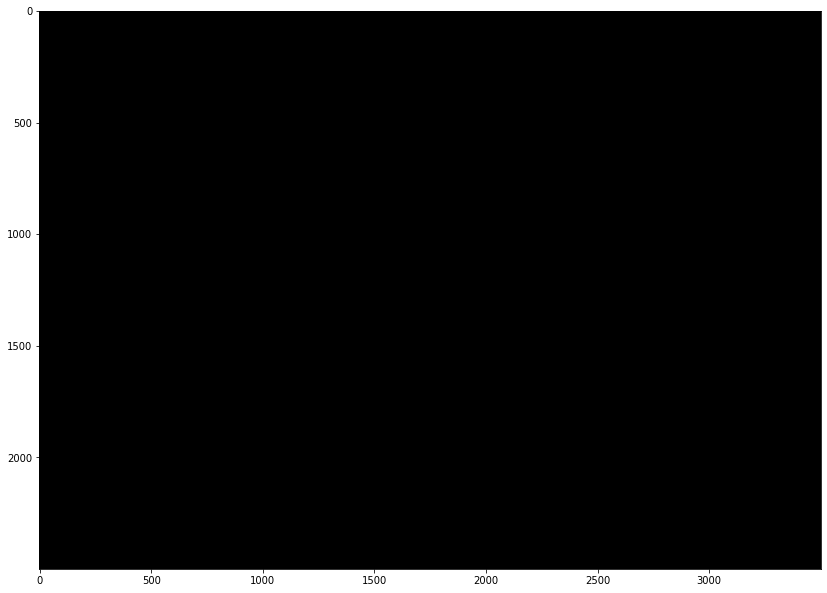

In [208]:
# Si on réutilise les cartes précédentes, les tailles des cartes font une taille de:
print(L_cartes_splendor[0].shape)
# 700,500 ( et 3 couleurs)

# On va donc faire un (grand) tapis.

image_tapis = np.zeros([2500,3500,3])
fig, ax = plt.subplots(figsize=(14, 14))
fig = plt.imshow(image_tapis,interpolation = 'nearest')

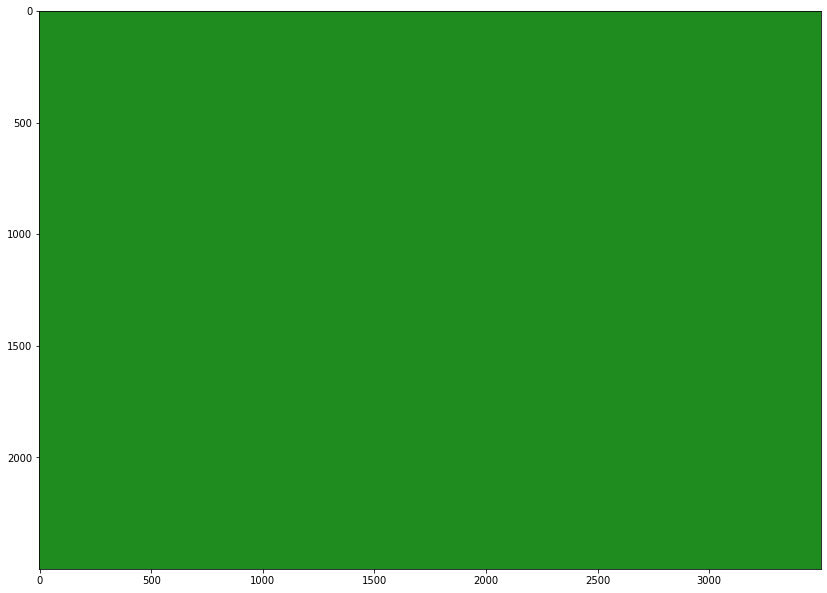

In [222]:
#C'est beau c'est noir, on préfèrerait en vert : 

image_tapis[:,:,:] = [30,140,30] # Voyez comme python est malin est va tout seul mettre cette liste de taille 3 dans la 3e dimension
image_tapis=image_tapis.astype(int) # On force le codage de l'image sur (0,255)
fig, ax = plt.subplots(figsize=(14, 14))
fig = plt.imshow(image_tapis,interpolation = 'nearest')

In [223]:
#Et si on veut mettre des cartes? 
#Définissons des emplacements: On va décider du coin gauche de positionnement de chaque carte

n_cartes_affichees = 3
coins_gauche = [[1800,250+1000*i] for i in range(n_cartes_affichees)]

image_tapis_cartes = image_tapis.copy()

# Maintenant on insère des cartes en remplaçant les pixels de image_tapis par ceux des cartes
for i_carte in range(n_cartes_affichees):
    coin = coins_gauche[i_carte]
    carte = L_cartes_splendor[i_carte]
    h_carte,l_carte,couleurs = carte.shape
    image_tapis_cartes[coin[0]:coin[0]+h_carte,coin[1]:coin[1]+l_carte,:] = carte


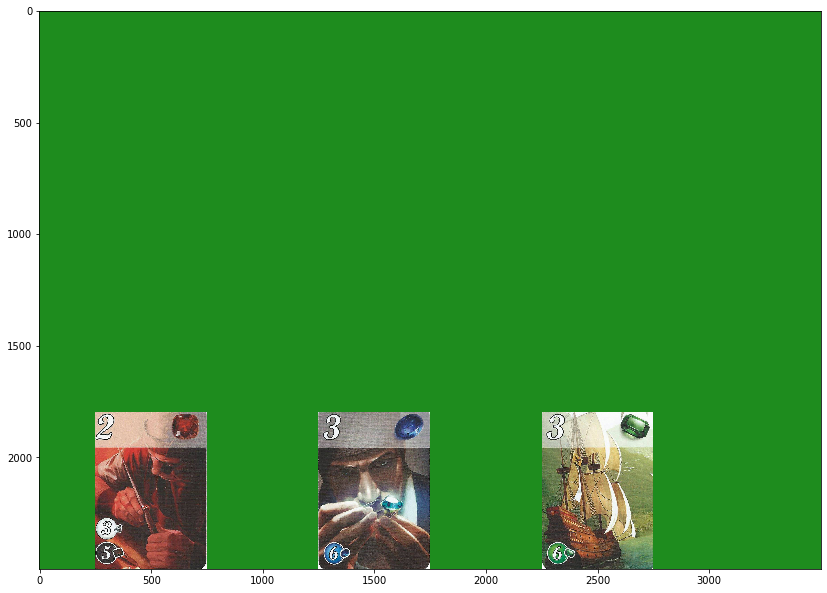

In [228]:
fig, ax = plt.subplots(figsize=(14, 14))
fig = plt.imshow(image_tapis_cartes,interpolation = 'nearest')

## Affichage colonne

In [232]:
# Et si nous ne sommes intéressé que par l'affichage des infos intéressantes mais pas les images,
# Il suffit de mieux choisir les positions des coins gauche et faire attention à l'ordre de parcours. 

n_cartes_affichees = 3
coins_gauche = [[1000+200*i,250+200*i] for i in range(n_cartes_affichees)]

image_tapis_cartes_2 = image_tapis.copy()

# Maintenant on insère des cartes en remplaçant les pixels de image_tapis par ceux des cartes
for i_carte in range(n_cartes_affichees):
    coin = coins_gauche[i_carte]
    carte = L_cartes_splendor[i_carte]
    h_carte,l_carte,couleurs = carte.shape
    image_tapis_cartes_2[coin[0]:coin[0]+h_carte,coin[1]:coin[1]+l_carte,:] = carte



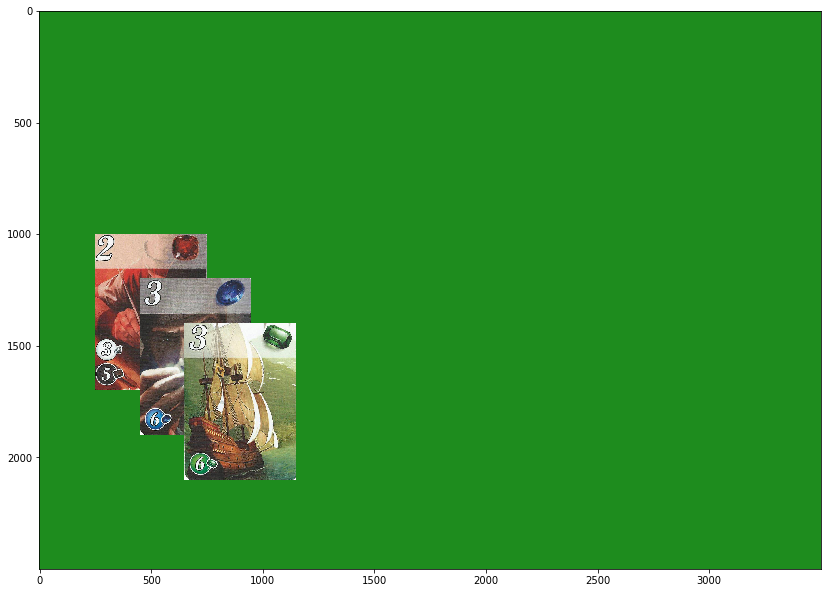

In [233]:
fig, ax = plt.subplots(figsize=(14, 14))
fig = plt.imshow(image_tapis_cartes_2,interpolation = 'nearest')

## Déplacement pion plateau

In [27]:
my_plateau = plt.imread('plateau-jeu-oie.jpg')
my_plateau.shape

(800, 800, 3)

In [111]:
pixel_centre = [370,390]
n_cases = 63
R0 = 330
decay_pixels = 70
# Un exemple de construction de la liste des positions des cases acceptable même si ça ne tombe pas systématiquement juste à l'affichage.

# On construit une liste de positions en coordonnées polaires pour repérer l'emplacement des cases du plateau
# La construction est faite de manière approximative
thetas = [2*np.pi/31*(i-1./4) for i in range(n_cases)] # On fait un tour en 31 cases à peu près
rayons = [R0 - i/31*decay_pixels for i in range(n_cases)] # On se rapproche 31 pixels du centre en 31 cases à peu près
places_cases = [[int(pixel_centre[0] + rayons[i]*np.cos(thetas[i])), int(pixel_centre[1] + rayons[i]*np.sin(thetas[i]))] for i in range(n_cases)]


In [112]:
# On vérifie la position des cases en affichant des carés jaunes sur la plateau pour voir ou ca tombe.
my_plateau_pions = my_plateau.copy()
for case in places_cases:
    my_plateau_pions[case[0]-5:case[0]+5,case[1]-5:case[1]+5,:] = [255,255,0]

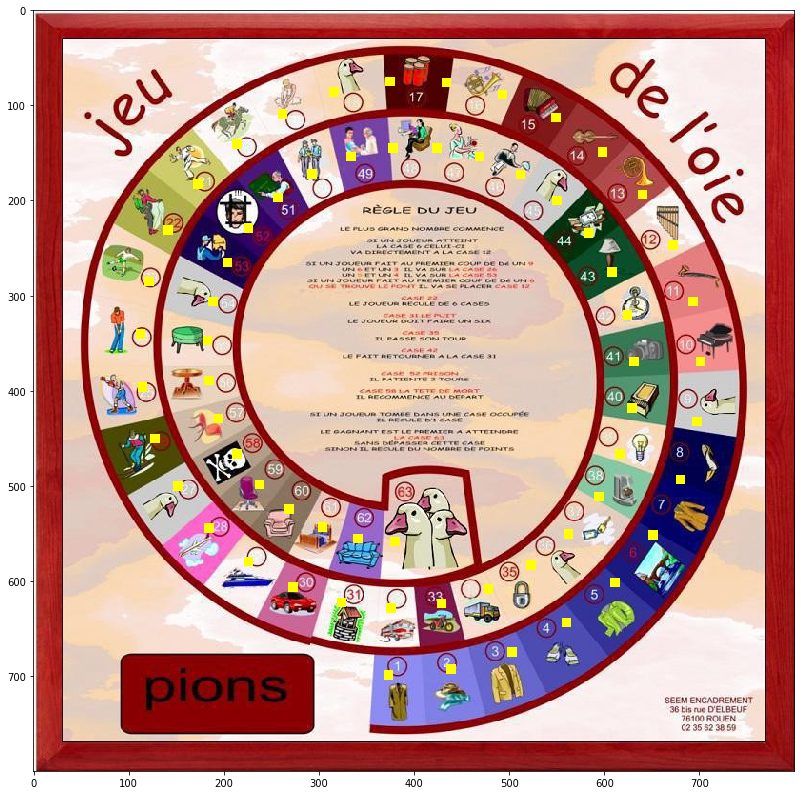

In [116]:
fig, ax = plt.subplots(figsize=(14, 14))
plt.imshow(my_plateau_pions,interpolation='nearest')
for case in places_cases:
    plt.imshow
    
# Bon on voit que c'est pas terrible pour les cases 6,7,8, c'est parce que les angles correspondants aux cases ne sont pas tous les mêmes.
# Tant pis on fera comme si c'était suffisant pour jouer.



In [182]:
#chargement pion. 
pion_0 = plt.imread('pion_0.png')
pion_1 = plt.imread('pion_1.png')
pion_2 = plt.imread('pion_2.png')
pion_0 = pion_0[:,:,:-1]*255 # Rescaling - pixels à valeur dans l'intervalle [0,255]
pion_1 = pion_1[:,:,:-1]*255 # Rescaling
pion_2 = pion_2[:,:,:-1]*255 # Rescaling

L_pions = [[0,3],[1,13],[2,25]] # couples numero_pion / case de presence
L_pions_images = [pion_0,pion_1,pion_2]

# On définit une fonction d'affichage:
def ajoute_pion(mon_plateau,mon_pion,L_pions_images):
    '''
    entrée, plateau avant insertion du pion, pion, liste des images correspondants aux pions
    sortie, plateau modifié contenant le pion
    '''
    hauteur_pion,largeur_pion,colors = L_pions_images[mon_pion[0]].shape
    centre_pion_x = places_cases[pion[1]][0] # pion[1] est la case de présence du pion
    centre_pion_y = places_cases[pion[1]][1]
    mon_plateau[centre_pion_x-hauteur_pion//2:centre_pion_x+hauteur_pion//2,centre_pion_y-largeur_pion//2:centre_pion_y+largeur_pion//2,:] = L_pions_images[mon_pion[0]] # pion[0] est le numéro du pion
    return mon_plateau
# placement sur les cases 3,13,25

my_plateau_pions_2 = my_plateau.copy()
my_plateau_pions_2 = np.minimum(my_plateau_pions_2,255)

for pion in L_pions:
    ajoute_pion(my_plateau_pions_2,pion,L_pions_images)

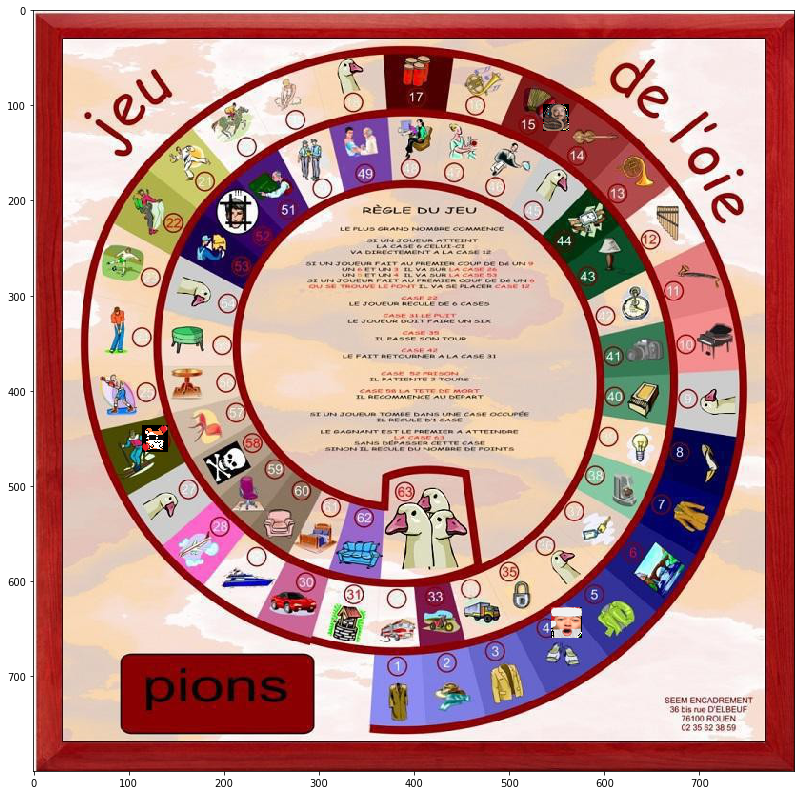

In [183]:
fig, ax = plt.subplots(figsize=(14, 14))
plt.imshow(my_plateau_pions_2,interpolation='nearest')
for case in places_cases:
    plt.imshow

In [ ]:
# Il est donc possible de gérer le jeu avec seulement les pions et donc en ne traitant que les règles 
# permettant de traiter le passage d'une case à l'autre, les tours, les dès etc... et gérer à part l'affichage qui 
#ne nécessite que la connaissance du numéro de la case (contenue dans la liste pion définissant chaque pion)